Names of students that did the assignment.

1. Abidoye Motunrayo Faith
2. Nimatallahi Masuud
3. Olasimbo Akinbobola
4. Marvellous Owoade
5. Olajumoke Ayeni
6. Keji Akinsanya
7. Nkiruka Ozoji
8. Nomaswazi Nkosi
9. Felicia Cletus

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [ ]:
# Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Overview of the shape
df_hr.shape

(14999, 10)

In [ ]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
# Overview of the dataset
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Checking dataset for null values
df_hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# renaming the columns for easy exploration
df_hr = df_hr.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion'
                        })
df_hr.head(2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


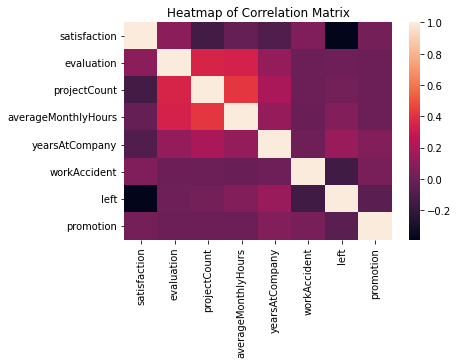

In [ ]:
# plotting a correlation heatmap to check the correlation of values in the data set
correlation = df_hr.corr()
sns.heatmap(correlation, xticklabels= correlation.columns.values, yticklabels= correlation.columns.values)
plt.title('Heatmap of Correlation Matrix')
correlation

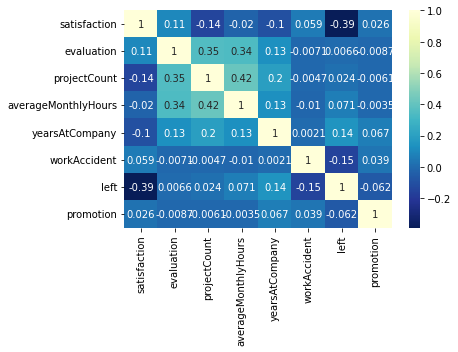

In [ ]:
# plotting a correlation heatmap to check the correlation of values in the data set
sns.heatmap(df_hr.corr(), cmap='YlGnBu_r', annot=True)

In [ ]:
# An overview of the 'left' column in the dataset
df_hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

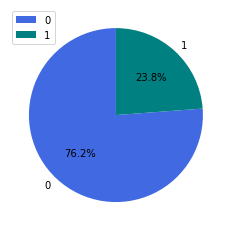

In [ ]:
# Pie chart showing the rate of employee turnover within the organisation
plt.pie(df_hr['left'].value_counts(),
        labels=df_hr['left'].value_counts().index,
        startangle=90, autopct='%1.1f%%', colors = ['royalblue', 'teal']
       )  
plt.legend();

The company has a low turn over rate with about 24% and the proportion of employee who didn't leave is roughly 76%: 

Note: Turnover means the people who left

In [ ]:
# Overview summary of employees who left V.S. those who didn't
left_summary = df_hr.groupby('left')
left_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<function matplotlib.pyplot.show(*args, **kw)>

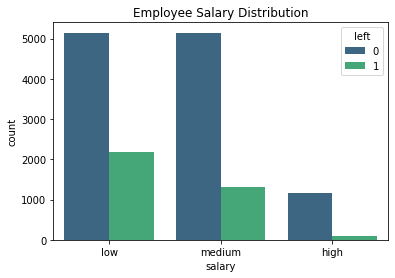

In [ ]:
# Exploring the relationship between employee salary and turnover
sns.countplot(x='salary', hue= 'left', data= df_hr, palette= 'viridis' )
plt.title("Employee Salary Distribution")
plt.show

Most of employees who left had either low or medium level salaries. Hardly did anyone within the high salary range leave the company; however, employees with low to medium salaries tend to leave the company. The higher your salary, the higher the tendency to stay. 

In [ ]:
# Getting the count of the departments in the dataset
df_dept = df_hr.Department.value_counts()
df_dept

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

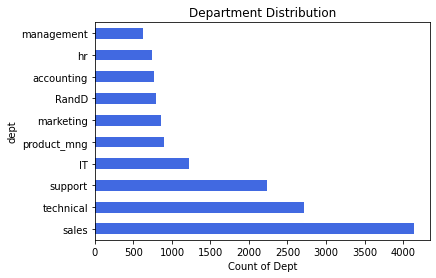

In [ ]:
# Plotting a bar graph for the various departments 
df_dept.plot(kind='barh', color='royalblue')
plt.xlabel('Count of Dept')
plt.ylabel('dept')
plt.title('Department Distribution');

The sales department has the highest number of employee, followed closely by technical and support departments; while the managment, accounting and hr departments have the least employee.

<function matplotlib.pyplot.show(*args, **kw)>

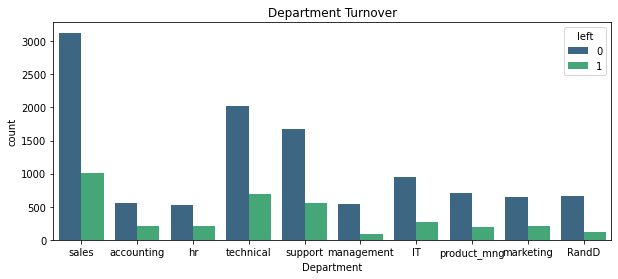

In [ ]:
# Visualizing the departments within the organisation 
# and the proportion of worker distribution in each department
plt.figure(figsize= (10,4))
sns.countplot(x='Department', hue= 'left', data= df_hr, palette= 'viridis' )
plt.title('Department Turnover')
plt.show

Highest turnover is recorded in the sales, technical and support departments; whereas, the least is in management department.

Note: Turnover means the employees who left the organisation.

RoyalBlue(0) Stayed, TealBlue(1) Left

In [ ]:
# Getting the count for the average monthly hours for the departments
time_dept = df_hr[['averageMonthlyHours', 'Department']].value_counts()
time_dept

averageMonthlyHours  Department
156                  sales         67
135                  sales         50
149                  sales         45
160                  sales         44
271                  sales         43
                                   ..
286                  hr             1
122                  IT             1
170                  accounting     1
121                  hr             1
190                  hr             1
Length: 1877, dtype: int64

In [ ]:
# Getting the mean hours used by each department
timedept_summary = time_dept.groupby('Department')
timedept_summary.mean()

Department
IT              6.292308
RandD           4.497143
accounting      4.308989
hr              4.198864
management      3.865031
marketing       4.740331
product_mng     4.956044
sales          19.345794
support        10.926471
technical      13.014354
dtype: float64

In [ ]:
# Putting mean hours used by each department in a dataframe
timedept_summary = time_dept.groupby(['Department']).mean().reset_index(name= 'Mean Time')
timedept_summary

,Department,Mean Time
0,IT,6.292308
1,RandD,4.497143
2,accounting,4.308989
3,hr,4.198864
4,management,3.865031
5,marketing,4.740331
6,product_mng,4.956044
7,sales,19.345794
8,support,10.926471
9,technical,13.014354


<function matplotlib.pyplot.show(*args, **kw)>

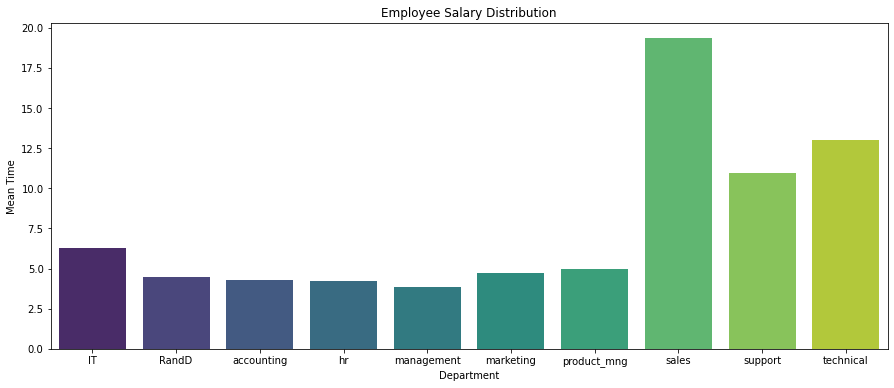

In [ ]:
# Visualizing the average time worked by each department 
plt.figure(figsize= (15, 6))
sns.barplot(x='Department', y= 'Mean Time', data= timedept_summary, palette= 'viridis' )
plt.title("Employee Salary Distribution")
plt.show

The sales department has the highest average hours worked by employees, followed closely by technical and support departments; Which may be one of the reasons why these departments have large employee turnovers. While the management department have the least average work hours by employee.

In [ ]:
project_rate = df_hr.projectCount.value_counts()
project_rate

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: projectCount, dtype: int64

In [ ]:
# Getting the count of the projects in %
project_rate = df_hr.projectCount.value_counts() / 14999
project_rate

4    0.291019
3    0.270351
5    0.184079
2    0.159211
6    0.078272
7    0.017068
Name: projectCount, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

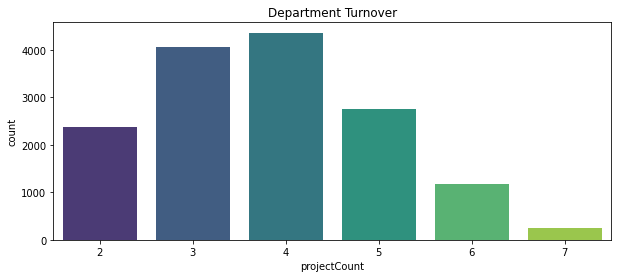

In [ ]:
# Visulization showing the project counts 
plt.figure(figsize= (10,4))
sns.countplot(x='projectCount', data= df_hr, palette= 'viridis' )
plt.title('Department Turnover')
plt.show

Most of the employees worked on 4  and 3 projects; while just a negligible number of employees had 7 projects

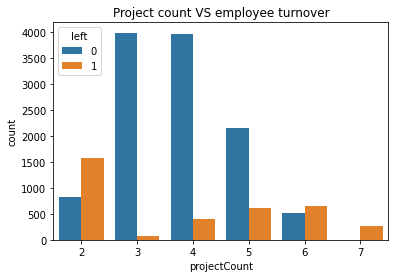

In [ ]:
# Visualization showing the relationship between project count and employee turnover
sns.countplot(x="projectCount", hue="left", data=df_hr)
plt.title('Project count VS employee turnover')
plt.show()

Over half of the workers on projects 2, 6, and 7 left the organisation. Mostb employees that stayed had 3, 4, and 5 projects. The rate of turn over increases as the number of projects rose. It can be surmised most employees that feel overworked (6 projects and above) or underused (just 2 projects left the company).

Note: Blue(0) stayed, Orange(1) Left

In [ ]:
df_hr['averageMonthlyHours'].mean()

201.0503366891126

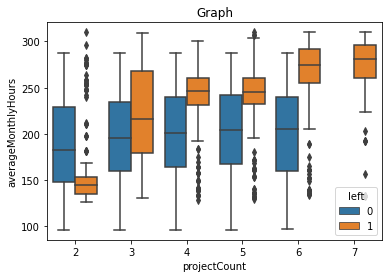

In [ ]:
# Visualization showing a relationship between the project counts, average monthly hours and employee turnover
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="left", data=df_hr)
plt.title("Graph")
plt.show()

The project count increased as the average monthly hours increased. Surprisingly, the employee who left seems to have significant increase in the average work hours as the number of project increased, while employee who stayed has only marginal increase in avearge work hours even as the number of project rose.

In [ ]:
# Checking the values of employee who left and their satisfaction level
sat_left = df_hr[['left', 'satisfaction']].value_counts()
sat_left

left  satisfaction
1     0.10            358
      0.11            335
0     0.50            226
      0.66            217
      0.59            212
                     ... 
1     0.68              1
      0.21              1
      0.22              1
      0.29              1
      0.67              1
Length: 170, dtype: int64

In [ ]:
# Checking the size of average hours worked by employees who stayed and those that left
satleft_summary = sat_left.groupby(['left'])
satleft_summary.size()

left
0    89
1    81
dtype: int64

In [ ]:
# Getting the mean satisfaction for employees that stayed and those that left
satleft2_summary = sat_left.groupby(['left'])
satleft2_summary.mean()

left
0    128.404494
1     44.086420
dtype: float64

From the data set, We will be using the following parameters as independent variables in the model training: 
customer satisfaction, salary, promotion, average work hours, project counts.



In [ ]:
# creating a data frame for the independent variables
ind_hr = df_hr[['satisfaction','averageMonthlyHours','promotion', 'projectCount', 'salary']]
ind_hr.head()

,satisfaction,averageMonthlyHours,promotion,projectCount,salary
0,0.38,157,0,2,low
1,0.80,262,0,5,medium
2,0.11,272,0,7,medium
3,0.72,223,0,5,low
4,0.37,159,0,2,low


In [ ]:
# converting salary to dummy variables using one hot encoding
indhr_dummies = pd.get_dummies(ind_hr.salary, prefix='salary')
indhr_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
# Merging dummy variables to the main dataset
merged_dummy = pd.concat([ind_hr, indhr_dummies], axis= 'columns')
merged_dummy 

,satisfaction,averageMonthlyHours,promotion,projectCount,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,2,low,0,1,0
1,0.80,262,0,5,medium,0,0,1
2,0.11,272,0,7,medium,0,0,1
3,0.72,223,0,5,low,0,1,0
4,0.37,159,0,2,low,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,2,low,0,1,0
14995,0.37,160,0,2,low,0,1,0
14996,0.37,143,0,2,low,0,1,0
14997,0.11,280,0,6,low,0,1,0


In [ ]:
# Dropping a dummy column
final_dummy = merged_dummy.drop(['salary', 'salary_medium'], axis ='columns')
final_dummy.head(2)

,satisfaction,averageMonthlyHours,promotion,projectCount,salary_high,salary_low
0,0.38,157,0,2,0,1
1,0.80,262,0,5,0,0


In [ ]:
# Indicating the x value for training
x = final_dummy
x.head(2)

,satisfaction,averageMonthlyHours,promotion,projectCount,salary_high,salary_low
0,0.38,157,0,2,0,1
1,0.80,262,0,5,0,0


In [ ]:
# Indicating the y value for training
y = df_hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8)

In [ ]:
# Importing libraries for model creation
from sklearn.linear_model import LogisticRegression
hr_model= LogisticRegression()

In [ ]:
# Fitting the data into the model
hr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Getting the accuracy score of the model
hr_model.score(x_test, y_test)

0.795

In [ ]:
# Values for x test
x_test.head()

,satisfaction,averageMonthlyHours,promotion,projectCount,salary_high,salary_low
6279,0.23,200,0,4,0,1
14401,0.09,283,0,7,0,1
7305,0.44,113,0,3,0,1
3102,0.97,225,0,3,0,0
13092,0.50,137,0,5,0,1


In [ ]:
# Predicted model
hr_model.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
# Predicting if an employee with a satisfaction rate of 0.9, 242 avg hrs, 
# who did 6 projects, never got a promotion and has medium salary will leave the company
hr_model.predict([[0.9, 242, 0, 6, 0, 0 ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
# Predicting if an employee with a satisfaction rate of 0.62, 200 avg hrs, 
# who did 4 projects, never got a promotion and has low salary will leave the company
hr_model.predict([[0.62, 200, 0, 4, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
# Predicting if an employee with a satisfaction rate of 0.9, 242 avg hrs, 
# who did 6 projects, never got a promotion and has low salary will leave the company
hr_model.predict([[0.11, 290, 0, 7, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
# converting salary column into integer using label encoder
#from sklearn.preprocessing import LabelEncoder
#le_salary = LabelEncoder()

In [1]:
# Importing LabelEncoder for model training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Converting salary into numerical variables
dfle = ind_hr
dfle.salary = le.fit_transform(dfle.salary)
dfle

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,satisfaction,averageMonthlyHours,promotion,projectCount,salary
0,0.38,157,0,2,1
1,0.80,262,0,5,2
2,0.11,272,0,7,2
3,0.72,223,0,5,1
4,0.37,159,0,2,1
...,...,...,...,...,...
14994,0.40,151,0,2,1
14995,0.37,160,0,2,1
14996,0.37,143,0,2,1
14997,0.11,280,0,6,1


In [ ]:
# Indicating the x values
x = dfle.values
x

array([[3.80e-01, 1.57e+02, 0.00e+00, 2.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 5.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 7.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 2.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 6.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 2.00e+00, 1.00e+00]])

In [ ]:
# Indicating the y values
y = df_hr.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
# Importing the needed libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('salary', OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
# Fitting and transforming x
x = ct.fit_transform(x)
x

<14999x96 sparse matrix of type '<class 'numpy.float64'>'
	with 59078 stored elements in Compressed Sparse Row format>

In [ ]:
# Slicing out the first column of the dummy variable
x = x[:,1:]
x

<14999x95 sparse matrix of type '<class 'numpy.float64'>'
	with 58883 stored elements in Compressed Sparse Row format>

In [ ]:
# Importing the needed libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8)

In [ ]:
# Importing the needed libraries
from sklearn.linear_model import LogisticRegression
hr_model2= LogisticRegression()

In [ ]:
# Model Training 
hr_model2.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicting 
hr_model2.predict(x_test)

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
# Checking for accuracy 
hr_model2.score(x_test, y_test)

0.872